In [59]:
import numpy as np
import torch
import tensorly as tly
from tensorly.decomposition import parafac, non_negative_parafac
from data import datasets
import matplotlib.pyplot as plt

def plot_factors(factors, d=3):
    a, b, c = factors
    rank = a.shape[1]
    fig, axes = plt.subplots(rank, d, figsize=(8, int(rank * 1.2 + 1)))
    factors_name = ["Time", "Features", "Time"] if d==3 else ["Time", "Features"]
    for ind, (factor, axs) in enumerate(zip(factors[:d], axes.T)):
        axs[-1].set_xlabel(factors_name[ind])
        for i, (f, ax) in enumerate(zip(factor.T, axs)):
            sns.despine(top=True, ax=ax)
            ax.plot(f)
            axes[i, 0].set_ylabel("Factor " + str(i+1))
    fig.tight_layout()
    

In [60]:
X = datasets.SpatiotemporalDataset()
rank = 10

In [38]:
x = tly.tensor(X[0][0].squeeze())

In [68]:
factors = non_negative_parafac(x, rank=rank)

In [53]:
a, b, c = factors

In [73]:
for i in range(0, rank):
    plt.plot(range(0,110), factors[1][:, i])

TypeError: list indices must be integers or slices, not tuple

In [66]:
factors.shape

AttributeError: 'list' object has no attribute 'shape'

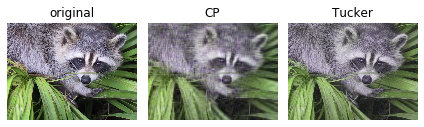

In [77]:
"""
Image compression via tensor decomposition
==========================================
Example on how to use :func:`tensorly.decomposition.parafac`and :func:`tensorly.decomposition.tucker` on images.
"""

import matplotlib.pyplot as plt
import tensorly as tl
import numpy as np
from scipy.misc import face
from tensorly.decomposition import parafac
from tensorly.decomposition import tucker
from math import ceil


random_state = 12345

image = tl.tensor(face(), dtype='float64')

def to_image(tensor):
    """A convenience function to convert from a float dtype back to uint8"""
    im = tl.to_numpy(tensor)
    im -= im.min()
    im /= im.max()
    im *= 255
    return im.astype(np.uint8)

# Rank of the CP decomposition
cp_rank = 25
# Rank of the Tucker decomposition
tucker_rank = [100, 100, 2]

# Perform the CP decomposition
weights, factors = parafac(image, rank=cp_rank, init='random', tol=10e-6)
# Reconstruct the image from the factors
cp_reconstruction = tl.kruskal_to_tensor((weights, factors))

# Tucker decomposition
core, tucker_factors = tucker(image, ranks=tucker_rank, init='random', tol=10e-5, random_state=random_state)
tucker_reconstruction = tl.tucker_to_tensor((core, tucker_factors))

# Plotting the original and reconstruction from the decompositions
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
ax.set_axis_off()
ax.imshow(to_image(image))
ax.set_title('original')

ax = fig.add_subplot(1, 3, 2)
ax.set_axis_off()
ax.imshow(to_image(cp_reconstruction))
ax.set_title('CP')

ax = fig.add_subplot(1, 3, 3)
ax.set_axis_off()
ax.imshow(to_image(tucker_reconstruction))
ax.set_title('Tucker')

plt.tight_layout()
plt.show()

(768, 1024, 3)